<a href="https://colab.research.google.com/github/HakimovAbdurahim/AutoCosts/blob/main/Autocosts_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt, style
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import utils

In [21]:
df = pd.read_csv('/content/auto_costs.csv')
df = df.set_index('ID')

In [22]:
# the first five rows of the data set
df.head()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
# data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   name              205 non-null    object 
 2   fueltypes         205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumbers       205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheels       205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [24]:
# describe the dataset
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Text(0.5, 1.0, 'Count of fuel types')

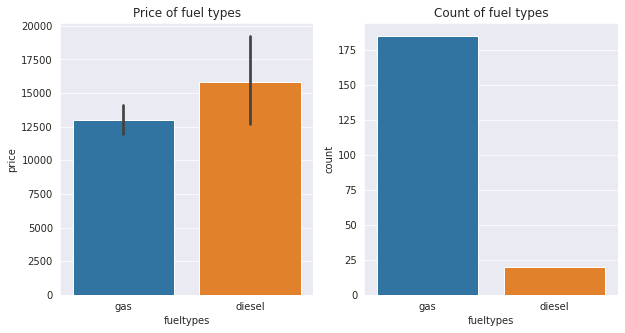

In [25]:
# Information about fuel types
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2, sharex=True, figsize=(10, 5))
sns.barplot(data=df, x='fueltypes', y='price', ax=axes[0])
sns.countplot(data=df, x='fueltypes', ax=axes[1])
axes[0].set_title('Price of fuel types')
axes[1].set_title('Count of fuel types')

Text(0.5, 1.0, 'Fuel type of cars')

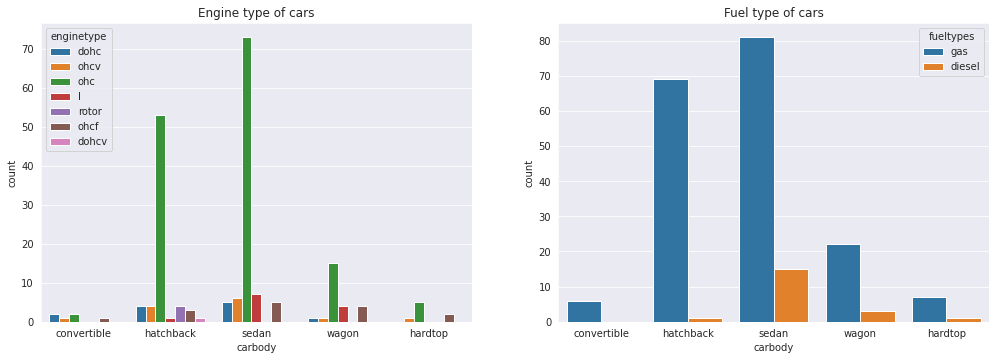

In [26]:
# Internal indicators of the car
fig, axes = plt.subplots(1,2, sharex=True, figsize=(17, 5.5))
sns.countplot(data=df, x="carbody", hue='enginetype',ax=axes[0])
sns.countplot(data=df, x="carbody", hue="fueltypes", ax=axes[1])
axes[0].set_title('Engine type of cars')
axes[1].set_title('Fuel type of cars')

Text(0.5, 0, 'Cars')

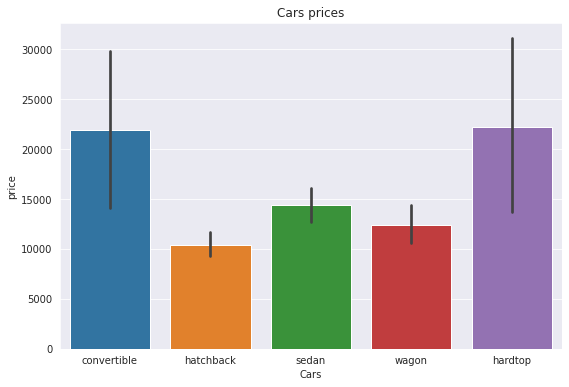

In [27]:
# Prices of car types
plt.subplots(figsize=(9,6))
prices = sns.barplot(data=df, x='carbody', y='price')
prices.set_title('Cars prices')
prices.set_xlabel('Cars')

In [28]:
# Convert data set columns to numbers
labelc = LabelEncoder()
df['name'] = labelc.fit_transform(df.name.values)
df['fueltypes'] = labelc.fit_transform(df.fueltypes.values)
df['aspiration'] = labelc.fit_transform(df.aspiration.values)
df['doornumbers'] = labelc.fit_transform(df.doornumbers.values)
df['carbody'] = labelc.fit_transform(df.carbody.values)
df['drivewheels'] = labelc.fit_transform(df.drivewheels.values)
df['enginelocation'] = labelc.fit_transform(df.enginelocation.values)
df['enginetype'] = labelc.fit_transform(df.enginetype.values)
df['cylindernumber'] = labelc.fit_transform(df.cylindernumber.values)
df['fuelsystem'] = labelc.fit_transform(df.fuelsystem.values)

In [29]:
df.head()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
# Columns that affect the price column of the data set
corr = df.corr()
corr.price.sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheels         0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
cylindernumber     -0.027628
doornumbers        -0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltypes          -0.105679
name               -0.231439
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

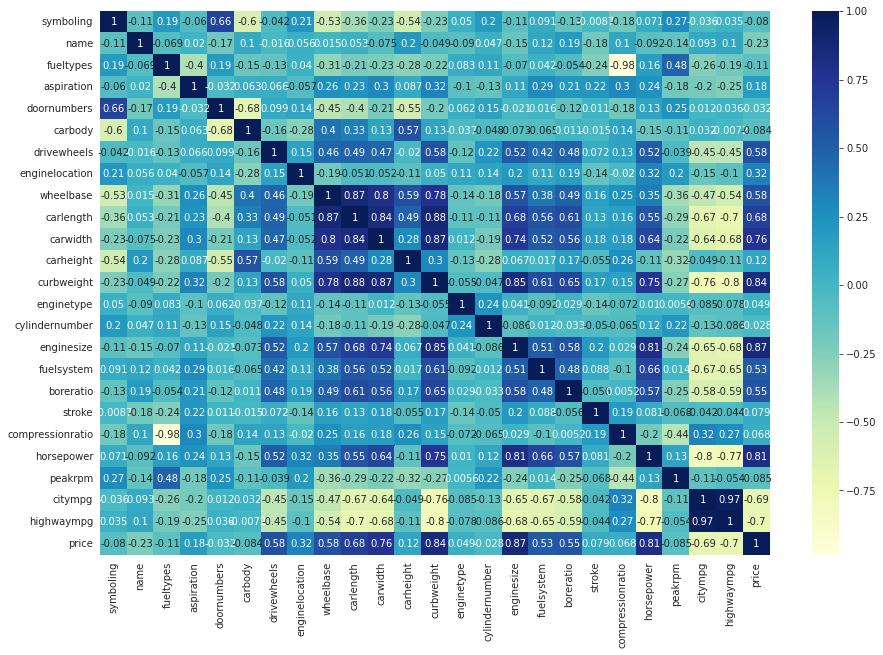

In [31]:
# Correlation of the dataset
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),  cmap="YlGnBu", annot=True)

In [32]:
# columns required for prediction
X = df[['horsepower','enginesize','curbweight','carwidth']]
Y = df['price']

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

In [34]:
# Linear Regression model
from sklearn.linear_model import LinearRegression

md = LinearRegression()

DT_model = md.fit(xtrain,ytrain)

DT_predict = DT_model.predict(xtest)

In [35]:
# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

dtree_model = regressor.fit(xtrain, ytrain)

dtree_predic = dtree_model.predict(xtest)

In [36]:
# Testing and training the model
print('Linear Regression\nScore:', md.score(xtest, DT_predict),"\nR2 Score: %d" % (r2_score(DT_predict, ytest)*100) + '%')
print('\nDecision Tree Regressor\nScore:', regressor.score(xtest, dtree_predic),"\nR2 Score: %d" % (r2_score(dtree_predic, ytest)*100) + '%')

Linear Regression
Score: 1.0 
R2 Score: 71%

Decision Tree Regressor
Score: 1.0 
R2 Score: 84%


In [39]:
# The difference between the actual price and the estimated price
a = pd.DataFrame(np.array(ytest), columns=['Actual'])
b = pd.DataFrame(dtree_predic, columns=['Decision predict'])
d = pd.DataFrame(DT_predict, columns=['Linear predict'])
c = pd.concat([a, b, d], axis=1)

In [40]:
c.head(15)

,Actual,Decision predict,Linear predict
0,9895.0,9295.0,13478.920621
1,18150.0,23875.0,18171.734124
2,10795.0,11245.0,10698.889019
3,11845.0,10945.0,6930.694682
4,36000.0,40960.0,48166.364557
5,8495.0,10245.0,11938.913870
6,6295.0,8916.5,5824.729962
7,11549.0,18344.0,16247.671200
8,8058.0,8238.0,7047.208744
9,22470.0,22625.0,17456.848357
